<a href="https://colab.research.google.com/github/joyinning/Data-Analysis_Top-Songs-in-Music-Streaming-Companies/blob/main/Data%20Analysis%3A%20Top%20100%20songs%20in%20Music%20Streaming%20Companies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Analysis: Top 100 Songs in Music Streaming Companies**

## **1. Goal**

The goal of the second mini-project is to analyze the popularity and audio features of songs selected by giant companies in the music-streaming (or reviewing) industry, including ***Spotify***, ***Rolling Stone***, ***Billboard***, and ***Red Music Company***.

Through this project, we can answer the following questions.
1. *What is the standard(s) of each company to select the best song?*
2. *Are the best songs popular in public?*


**Note** <bR>
All the information is in the Spotify Web API, even though these songs are selected from different music-streaming companies.

## **2. Spotify API**

To collect the information of the playlists, we need to connect the **Spotify Web API**.

**Spotipy Library**

Spotify provides large datasets on songs internally and allows us to access them through their Web API. <br> Currently, there is a lightweight Python library for the Spotify Web API, called `Spotipy`.
- It provides useful functions to get information from the Web API without writing complex codes.

**Install `Spotipy` library**

In [ ]:
%pip install spotipy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 kB 10.3 MB/s eta 0:00:00


**Import `Spotipy` library**

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

All methods in spotipy library require **user authorization**and there are two types of authenticating: <Br>
One of the types is authenticating **without a specific user** that is used in this project. The other type is using the information of a particular user.
- Even though we don't have specific user information, we can access general features of Spotify, including public playlists and stats of music listened to.

To get the authorization code, we need the client id and client secret codes first.

In [ ]:
client_id = ""
client_secret = ""

- `SpotifyClientCredentials()`: The Client Credentials flow is used in server-to-server authentication.
- `Spotify()`: Creates a Spotify API client.

In [ ]:
# Authentication - without user
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

## **3. Create URI**

In this case, we need a URI (Uniform Resource Identifiers) to refer to an object in Spotify. <br>
Create a method that takes the URI from a playlist object and outputs JSON data, which consists of all information.
- It is already decoded.

[***Billboard***] <br>
Billboard Hot 100: https://open.spotify.com/playlist/6UeSakyzhiEt4NB3UAd6NQ
- This is official!

In [ ]:
billboard_link = "https://open.spotify.com/playlist/6UeSakyzhiEt4NB3UAd6NQ"
billboard_uri = billboard_link.split("/")[-1]

In [ ]:
print(billboard_uri)

6UeSakyzhiEt4NB3UAd6NQ


[***Rolling Stone***] <br>
Rolling Stone Top 100 Songs 2022: https://open.spotify.com/playlist/43pQe61RRfMbz7aFbAzOPf

In [ ]:
rollingstone_link = "https://open.spotify.com/playlist/43pQe61RRfMbz7aFbAzOPf"
rollingstone_uri = rollingstone_link.split("/")[-1]

In [ ]:
print(rollingstone_uri)

43pQe61RRfMbz7aFbAzOPf


[***Spotify***] <br>
Top 100 most streamed songs on Spotify:
https://open.spotify.com/playlist/5ABHKGoOzxkaa28ttQV9sE

In [ ]:
spotify_link = "https://open.spotify.com/playlist/5ABHKGoOzxkaa28ttQV9sE"
spotify_uri = spotify_link.split("/")[-1]

In [ ]:
print(spotify_uri)

5ABHKGoOzxkaa28ttQV9sE


[***Red Music Company***] <br>
Top 100 Songs of 2023 (Best Hit Music Playlist): https://open.spotify.com/playlist/1EVE9kOZ2i4171hNdvWVhU
- This is official!

In [ ]:
redmusic_link= "https://open.spotify.com/playlist/1EVE9kOZ2i4171hNdvWVhU"
redmusic_uri = redmusic_link.split("/")[-1]

In [ ]:
print(redmusic_uri)

1EVE9kOZ2i4171hNdvWVhU


## **4. Extract Track information**

We need the following informations.
- ***Artist's name***
- ***Genre***
- ***Popularity of the song*** (not artist)
- ***Audio features***



---



Before extracting the information, we must understand the structure of the playlist object.

**The structure of the playlist object** <br>
There are many objects in the URI object, but we will use the tracks object for the analysis.

The basic structure of the URI object is as follows.
- `tracks` (object) > `items` (array of `PlaylistTrackObject`) > `track` (oneOf) > `TrackObject` (Object)

The following functions provided by spotipy library will be used to extract the track information.
- `playlist_tracks()`: It shows full details of the tracks object in the playlist.
    > The maximum number of tracks to return is 100.
- `artist()`: It gets the information of the artist using the artist's URI.
- `audio_features()`: It gets the information of the audio features of each song (each track URI).



---



**1) Create items array object from the tracks object**

First, call the `items` array object from the `tracks` object of each playlist, using the `playlist_tracks()` function that gets full details of the tracks in a playlist.

In [ ]:
billboard = sp.playlist_tracks(billboard_uri)["items"]
rollingstone = sp.playlist_tracks(rollingstone_uri)["items"]
spotify = sp.playlist_tracks(spotify_uri)["items"]
redmusic = sp.playlist_tracks(redmusic_uri)["items"]

Each element in the `items` object is '`JSON`' (Python dictionaries and lists) type.

Check the first element of each playlist to see what the object looks like.

In [ ]:
from pprint import pprint
# pprint(billboard[0])
# pprint(rollingstone[0])
# pprint(spotify[0])
# pprint(redmusic[0])

{'added_at': '2023-04-23T17:40:54Z',
 'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/billboard.com'},
              'href': 'https://api.spotify.com/v1/users/billboard.com',
              'id': 'billboard.com',
              'type': 'user',
              'uri': 'spotify:user:billboard.com'},
 'is_local': False,
 'primary_color': None,
 'track': {'album': {'album_group': 'album',
                     'album_type': 'album',
                     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4oUHIQIBe0LHzYfvXNW4QM'},
                                  'href': 'https://api.spotify.com/v1/artists/4oUHIQIBe0LHzYfvXNW4QM',
                                  'id': '4oUHIQIBe0LHzYfvXNW4QM',
                                  'name': 'Morgan Wallen',
                                  'type': 'artist',
                                  'uri': 'spotify:artist:4oUHIQIBe0LHzYfvXNW4QM'}],
                     'available_markets': ['AD',
             

**2) Run the for loop to collect the required information of each track in a playlist**

Run the for loop to collect and store information to the new list type variables of each required information.



---



First, we will collect the information of the **Billboard Hot 100 songs playlist**.

**Track Information**

`track_uri_list`: We need this to collect the audio features of each song. <br>


`track_popularity_list`: It contains the popularity score on 100 points scale (100 is the most popular.) of each song. <br>


`track_name_list`: It has the title of each track.

`track_audio_features_list`: It consists of audio features with a dictionary type.

In [ ]:
track_uri_list_b = []
track_popularity_list_b = []
track_name_list_b = []
for track in billboard:
    track_uri_list_b.append(track["track"]["uri"])
    track_popularity_list_b.append(track["track"]["popularity"])
    track_name_list_b.append(track["track"]["name"])

In [ ]:
track_audio_features_list_b = []
for i in range(len(track_uri_list_b)):
    track_audio_features_list_b.append(sp.audio_features(track_uri_list_b[i])[0])

In [ ]:
print("track_name_list[0]:", track_name_list_b[0])
print("track_popularity_list[0]", track_popularity_list_b[0])
print("track_audio_features_list[0]", track_audio_features_list_b[0])

track_name_list[0]: Last Night
track_popularity_list[0] 89
track_audio_features_list[0] {'danceability': 0.492, 'energy': 0.675, 'key': 6, 'loudness': -5.456, 'mode': 1, 'speechiness': 0.0389, 'acousticness': 0.467, 'instrumentalness': 0, 'liveness': 0.142, 'valence': 0.478, 'tempo': 203.759, 'type': 'audio_features', 'id': '7K3BhSpAxZBznislvUMVtn', 'uri': 'spotify:track:7K3BhSpAxZBznislvUMVtn', 'track_href': 'https://api.spotify.com/v1/tracks/7K3BhSpAxZBznislvUMVtn', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7K3BhSpAxZBznislvUMVtn', 'duration_ms': 163855, 'time_signature': 4}


We will convert the dictionary (audio features) to a new data frame later.

**Artist Information**

`artist_uri_list`: It has the URI information of each artist in a track

`artist_name_list`: It contains the name of artists.

`artist_genre_list`: It consists of genre information with a list type. (Because some songs have multiple genres.)

In [ ]:
artist_uri_list_b = []
for track in billboard:
    artist_uri_list_b.append(track["track"]["artists"][-1]['uri'])

In [ ]:
artist_name_list_b = []
artist_genre_list_b = []
for i in range(0, len(artist_uri_list_b)):
    artist_name_list_b.append(sp.artist(artist_uri_list_b[i])['name'])
    artist_genre_list_b.append(sp.artist(artist_uri_list_b[i])['genres'])

In [ ]:
print("artist_name_list_b[0]:", artist_name_list_b[0])
print("artist_genre_list_b[0]", artist_genre_list_b[0])

artist_name_list_b[0]: Morgan Wallen
artist_genre_list_b[0] ['contemporary country']




---



Create the same for loop codes of other playlists.

**Rolling Stone Top 100**

Track Information

In [ ]:
track_uri_list_r = []
track_popularity_list_r = []
track_name_list_r = []
for track in rollingstone:
    track_uri_list_r.append(track["track"]["uri"])
    track_popularity_list_r.append(track["track"]["popularity"])
    track_name_list_r.append(track["track"]["name"])

In [ ]:
track_audio_features_list_r = []
for i in range(len(track_uri_list_r)):
    track_audio_features_list_r.append(sp.audio_features(track_uri_list_r[i])[0])

Artist Information

In [ ]:
artist_uri_list_r = []
for track in rollingstone:
    artist_uri_list_r.append(track["track"]["artists"][-1]['uri'])

In [ ]:
artist_name_list_r = []
artist_genre_list_r = []
for i in range(0, len(artist_uri_list_r)):
    artist_name_list_r.append(sp.artist(artist_uri_list_r[i])['name'])
    artist_genre_list_r.append(sp.artist(artist_uri_list_r[i])['genres'])

**Spotify Top 100**

Track Information

In [ ]:
track_uri_list_s = []
track_popularity_list_s = []
track_name_list_s = []
for track in spotify:
    track_uri_list_s.append(track["track"]["uri"])
    track_popularity_list_s.append(track["track"]["popularity"])
    track_name_list_s.append(track["track"]["name"])

In [ ]:
track_audio_features_list_s = []
for i in range(len(track_uri_list_s)):
    track_audio_features_list_s.append(sp.audio_features(track_uri_list_s[i])[0])

Artist Information

In [ ]:
artist_uri_list_s = []
for track in spotify:
    artist_uri_list_s.append(track["track"]["artists"][-1]['uri'])

In [ ]:
artist_name_list_s = []
artist_genre_list_s = []
for i in range(0, len(artist_uri_list_s)):
    artist_name_list_s.append(sp.artist(artist_uri_list_s[i])['name'])
    artist_genre_list_s.append(sp.artist(artist_uri_list_s[i])['genres'])

**Red Music Top 100**

Track Information

In [ ]:
track_uri_list_rm = []
track_popularity_list_rm = []
track_name_list_rm = []
for track in redmusic:
    track_uri_list_rm.append(track["track"]["uri"])
    track_popularity_list_rm.append(track["track"]["popularity"])
    track_name_list_rm.append(track["track"]["name"])

In [ ]:
track_audio_features_list_rm = []
for i in range(len(track_uri_list_rm)):
    track_audio_features_list_rm.append(sp.audio_features(track_uri_list_rm[i])[0])

Artist Information

In [ ]:
artist_uri_list_rm = []
for track in redmusic:
    artist_uri_list_rm.append(track["track"]["artists"][-1]['uri'])

In [ ]:
artist_name_list_rm = []
artist_genre_list_rm = []
for i in range(0, len(artist_uri_list_s)):
    artist_name_list_rm.append(sp.artist(artist_uri_list_rm[i])['name'])
    artist_genre_list_rm.append(sp.artist(artist_uri_list_rm[i])['genres'])

## **5. Create a dataset**

Using the collected information, create new datasets for the analysis.

**Billboard**

1) Create a dictionary that contains all collected information except the audio features.

In [ ]:
dic_b = {"track_id": track_uri_list_b, "track_title": track_name_list_b, "artist_name": artist_name_list_b,
       "genre": artist_genre_list_b, "popularity(100)": track_popularity_list_b}

2) Convert the dictionary to the data frame

In [ ]:
import pandas as pd
df_b = pd.DataFrame(dic_b)

In [ ]:
df_b.head()

,track_id,track_title,artist_name,genre,popularity(100)
0,spotify:track:7K3BhSpAxZBznislvUMVtn,Last Night,Morgan Wallen,[contemporary country],89
1,spotify:track:7aRCf5cLOFN1U7kvtChY1G,Search & Rescue,Drake,"[canadian hip hop, canadian pop, hip hop, rap,...",91
2,spotify:track:0yLdNVWF3Srea0uzk55zFn,Flowers,Miley Cyrus,[pop],100
3,spotify:track:3OHfY25tqY28d16oZczHc8,Kill Bill,SZA,"[pop, r&b, rap]",94
4,spotify:track:2dHHgzDwk4BJdRwy9uXhTO,Creepin' (with The Weeknd & 21 Savage),21 Savage,"[atl hip hop, hip hop, rap, trap]",97


3) Convert the dictionary of the audio features to the data frame and drop unnecessary columns

In [ ]:
df_audio_b = pd.DataFrame(track_audio_features_list_b)
df_audio_b = df_audio_b.drop(["id", "type", "uri", "track_href", "analysis_url", "time_signature"], axis = 1)

In [ ]:
df_audio_b.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.492,0.675,6,-5.456,1,0.0389,0.4670,0.000000,0.1420,0.478,203.759,163855
1,0.817,0.440,10,-8.482,0,0.0734,0.0603,0.000001,0.3300,0.544,142.024,272113
2,0.707,0.681,0,-4.325,1,0.0668,0.0632,0.000005,0.0322,0.646,117.999,200455
3,0.644,0.728,8,-5.750,1,0.0351,0.0543,0.169000,0.1610,0.430,88.993,153947
4,0.715,0.620,1,-6.005,0,0.0484,0.4170,0.000000,0.0822,0.172,97.950,221520


4) Combine the two data frames

In [ ]:
billboard_final = pd.concat([df_b, df_audio_b], axis = 1)

In [ ]:
billboard_final.head()

,track_id,track_title,artist_name,genre,popularity(100),danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,spotify:track:7K3BhSpAxZBznislvUMVtn,Last Night,Morgan Wallen,[contemporary country],89,0.492,0.675,6,-5.456,1,0.0389,0.4670,0.000000,0.1420,0.478,203.759,163855
1,spotify:track:7aRCf5cLOFN1U7kvtChY1G,Search & Rescue,Drake,"[canadian hip hop, canadian pop, hip hop, rap,...",91,0.817,0.440,10,-8.482,0,0.0734,0.0603,0.000001,0.3300,0.544,142.024,272113
2,spotify:track:0yLdNVWF3Srea0uzk55zFn,Flowers,Miley Cyrus,[pop],100,0.707,0.681,0,-4.325,1,0.0668,0.0632,0.000005,0.0322,0.646,117.999,200455
3,spotify:track:3OHfY25tqY28d16oZczHc8,Kill Bill,SZA,"[pop, r&b, rap]",94,0.644,0.728,8,-5.750,1,0.0351,0.0543,0.169000,0.1610,0.430,88.993,153947
4,spotify:track:2dHHgzDwk4BJdRwy9uXhTO,Creepin' (with The Weeknd & 21 Savage),21 Savage,"[atl hip hop, hip hop, rap, trap]",97,0.715,0.620,1,-6.005,0,0.0484,0.4170,0.000000,0.0822,0.172,97.950,221520


Do the same process above for the other platlists.

**Rolling Stone**

In [ ]:
dic_r = {"track_id": track_uri_list_r, "track_title": track_name_list_r, "artist_name": artist_name_list_r,
       "genre": artist_genre_list_r, "popularity(100)": track_popularity_list_r}
df_r = pd.DataFrame(dic_r)

In [ ]:
df_audio_r = pd.DataFrame(track_audio_features_list_r)
df_audio_r = df_audio_r.drop(["id", "type", "uri", "track_href", "analysis_url", "time_signature"], axis = 1)

In [ ]:
rollingstone_final = pd.concat([df_r, df_audio_r], axis = 1)

In [ ]:
rollingstone_final.head()

,track_id,track_title,artist_name,genre,popularity(100),danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,spotify:track:5ZCjp56T8J6d7amJyFSzrI,Heart Like A Truck,Lainey Wilson,"[contemporary country, modern country pop]",76,0.587,0.632,9,-5.416,1,0.0311,0.1480,0.000010,0.1580,0.392,139.974,199040
1,spotify:track:4ANZGc4p6NJxQ81C7aqIGw,Never Give Up,Chronixx,"[dancehall, modern reggae]",52,0.783,0.584,0,-10.211,1,0.1080,0.6380,0.002340,0.1050,0.953,75.391,259200
2,spotify:track:1lhQDa5Rit1iMpo4PQpIGO,Problem With It,Jess Williamson,[alternative americana],53,0.710,0.772,10,-5.364,1,0.0369,0.0576,0.000813,0.0996,0.539,122.006,212760
3,spotify:track:1Si6wrL2cPEiIy2aKLYKl8,SAGA,Hurray For The Riff Raff,"[alternative country, folk, new americana, new...",28,0.615,0.768,0,-6.332,1,0.0310,0.4510,0.000088,0.0820,0.625,127.943,275080
4,spotify:track:607ZGkxOxHJUVDEU3MZl86,Alaska,Grupo Firme,"[musica mexicana, norteno, nueva musica mexica...",68,0.588,0.866,8,-3.509,1,0.1050,0.2710,0.000000,0.0502,0.952,178.145,241107


**Spotify**

In [ ]:
dic_s = {"track_id": track_uri_list_s, "track_title": track_name_list_s, "artist_name": artist_name_list_s,
       "genre": artist_genre_list_s, "popularity(100)": track_popularity_list_s}
df_s = pd.DataFrame(dic_s)

In [ ]:
df_audio_s = pd.DataFrame(track_audio_features_list_s)
df_audio_s = df_audio_s.drop(["id", "type", "uri", "track_href", "analysis_url", "time_signature"], axis = 1)

In [ ]:
spotify_final = pd.concat([df_s, df_audio_s], axis = 1)

In [ ]:
spotify_final.head()

,track_id,track_title,artist_name,genre,popularity(100),danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,The Weeknd,"[canadian contemporary r&b, canadian pop, pop]",92,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,200040
1,spotify:track:7qiZfU4dY1lWllzX7mPBI3,Shape of You,Ed Sheeran,"[pop, uk pop]",88,0.825,0.652,1,-3.183,0,0.0802,0.58100,0.000000,0.0931,0.931,95.977,233713
2,spotify:track:2XU0oxnq2qxCpomAAuJY8K,Dance Monkey,Tones And I,[australian pop],79,0.824,0.588,6,-6.400,0,0.0924,0.69200,0.000104,0.1490,0.513,98.027,209438
3,spotify:track:7qEHsqek33rTcFNT9PFqLf,Someone You Loved,Lewis Capaldi,"[pop, uk pop]",90,0.501,0.405,1,-5.679,1,0.0319,0.75100,0.000000,0.1050,0.446,109.891,182161
4,spotify:track:7wGoVu4Dady5GV0Sv4UIsx,rockstar,21 Savage,"[atl hip hop, hip hop, rap, trap]",2,0.577,0.522,5,-6.594,0,0.0984,0.13000,0.000090,0.1420,0.119,159.772,218320


**Red Music**

In [ ]:
dic_rm = {"track_id": track_uri_list_rm, "track_title": track_name_list_rm, "artist_name": artist_name_list_rm,
       "genre": artist_genre_list_rm, "popularity(100)": track_popularity_list_rm}
df_rm = pd.DataFrame(dic_rm)

In [ ]:
df_audio_rm = pd.DataFrame(track_audio_features_list_rm)
df_audio_rm = df_audio_rm.drop(["id", "type", "uri", "track_href", "analysis_url", "time_signature"], axis = 1)

In [ ]:
redmusic_final = pd.concat([df_rm, df_audio_rm], axis = 1)

In [ ]:
redmusic_final.head()

,track_id,track_title,artist_name,genre,popularity(100),danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,spotify:track:4nrPB8O7Y7wsOCJdgXkthe,"Shakira: Bzrp Music Sessions, Vol. 53",Shakira,"[colombian pop, dance pop, latin pop, pop]",97,0.778,0.632,2,-5.600,0,0.0493,0.2740,0.000000,0.0915,0.498,122.104,218289
1,spotify:track:0yLdNVWF3Srea0uzk55zFn,Flowers,Miley Cyrus,[pop],100,0.707,0.681,0,-4.325,1,0.0668,0.0632,0.000005,0.0322,0.646,117.999,200455
2,spotify:track:1k6r6F3hdLtWvNjVZdlRHw,Song for You,Lee Isaacs,[],43,0.619,0.458,7,-7.880,1,0.0251,0.5470,0.000000,0.1370,0.391,135.914,168840
3,spotify:track:6AQbmUe0Qwf5PZnt4HmTXv,Boy's a liar Pt. 2,Ice Spice,[bronx drill],98,0.696,0.809,5,-8.254,1,0.0500,0.2520,0.000128,0.2480,0.857,132.962,131013
4,spotify:track:07bsRv0pcpbG4zJeLsUs1p,Eyes Closed,Ed Sheeran,"[pop, uk pop]",90,0.777,0.526,2,-6.221,1,0.0645,0.3020,0.000000,0.1050,0.389,107.071,194849


## **6. Data Analysis**

**Statistical Summary**

Billboard

In [ ]:
billboard_final.describe()

,popularity(100),danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,100.000000,100.000000,100.000000,100.0000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,85.080000,0.648650,0.632210,5.6200,-6.350080,0.630000,0.090410,0.254758,0.003589,0.177401,0.484139,123.760820,190779.150000
std,9.626017,0.133867,0.154065,3.3838,1.949302,0.485237,0.102101,0.238900,0.024336,0.120761,0.217110,26.997644,38478.020739
min,22.000000,0.369000,0.192000,0.0000,-12.151000,0.000000,0.024300,0.002160,0.000000,0.032200,0.038500,66.900000,95440.000000
25%,79.000000,0.537750,0.525750,2.0000,-7.284250,0.000000,0.032500,0.053575,0.000000,0.098675,0.327250,99.739250,166895.000000
50%,86.000000,0.647500,0.639500,6.0000,-5.968500,1.000000,0.046900,0.179500,0.000001,0.126000,0.453500,121.549500,187136.500000
75%,92.000000,0.738500,0.737000,8.0000,-5.048250,1.000000,0.089100,0.414750,0.000019,0.225500,0.644500,142.052750,214834.750000
max,100.000000,0.962000,0.965000,11.0000,-3.380000,1.000000,0.490000,0.874000,0.177000,0.679000,0.961000,203.759000,290892.000000


Rolling Stone

In [ ]:
rollingstone_final.describe()

,popularity(100),danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000
mean,65.520000,0.670240,0.694190,5.210000,-5.68600,0.670000,0.112764,0.193335,0.035120,0.178511,0.518950,121.425020,209748.11000
std,18.588842,0.163864,0.170274,3.726224,2.27304,0.472582,0.108258,0.224514,0.139818,0.150237,0.239025,26.859917,50697.74407
min,15.000000,0.262000,0.192000,0.000000,-12.78200,0.000000,0.025800,0.000003,0.000000,0.027200,0.106000,75.391000,104819.00000
25%,52.000000,0.565750,0.578500,1.750000,-7.14275,0.000000,0.042175,0.034550,0.000000,0.089675,0.327500,104.003750,177120.75000
50%,68.000000,0.694500,0.701500,5.000000,-5.53050,1.000000,0.065650,0.096350,0.000005,0.113500,0.528500,118.966000,206827.50000
75%,80.250000,0.795000,0.823000,8.000000,-4.25300,1.000000,0.124250,0.295000,0.000278,0.234250,0.709750,138.455250,232098.50000
max,93.000000,0.978000,0.991000,11.000000,-0.17300,1.000000,0.515000,0.822000,0.840000,0.890000,0.964000,178.145000,406472.00000


Spotify

In [ ]:
spotify_final.describe()

,popularity(100),danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,63.070000,0.650520,0.636210,5.48000,-6.124720,0.580000,0.10278,0.231063,0.009258,0.163114,0.508140,123.058710,210645.790000
std,33.676193,0.142474,0.159464,3.68036,2.109641,0.496045,0.09130,0.250735,0.052309,0.107327,0.224517,31.264875,43377.401999
min,0.000000,0.327000,0.264000,0.00000,-13.902000,0.000000,0.02320,0.000243,0.000000,0.034400,0.059000,71.105000,96000.000000
25%,45.750000,0.548000,0.523750,1.75000,-7.184750,0.000000,0.04395,0.028250,0.000000,0.094875,0.388250,98.808500,182138.000000
50%,82.500000,0.679000,0.644500,6.00000,-5.845000,1.000000,0.05940,0.130500,0.000000,0.119000,0.494000,119.986000,207006.500000
75%,86.000000,0.760250,0.764250,9.00000,-4.539000,1.000000,0.12825,0.381250,0.000090,0.184750,0.671000,145.338500,239062.750000
max,93.000000,0.921000,0.922000,11.00000,-2.749000,1.000000,0.43800,0.934000,0.465000,0.565000,0.969000,192.050000,354320.000000


Red Music

In [ ]:
redmusic_final.describe()

,popularity(100),danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000
mean,73.83000,0.662190,0.663350,4.980000,-5.949370,0.650000,0.078299,0.211406,0.012369,0.180641,0.524459,125.97906,195922.530000
std,21.16365,0.141777,0.148976,3.645892,2.006806,0.479372,0.065316,0.234094,0.078009,0.114037,0.232229,26.35714,51561.210634
min,1.00000,0.247000,0.236000,0.000000,-15.159000,0.000000,0.025100,0.000525,0.000000,0.024800,0.092300,78.00700,97393.000000
25%,71.00000,0.573750,0.563500,1.000000,-6.951750,0.000000,0.039400,0.040125,0.000000,0.098225,0.336750,107.03100,165410.500000
50%,81.50000,0.676000,0.663500,5.000000,-5.819000,1.000000,0.057250,0.121000,0.000002,0.141500,0.492500,123.98350,188898.000000
75%,87.00000,0.744250,0.769750,8.000000,-4.600250,1.000000,0.089475,0.304250,0.000066,0.248250,0.716250,140.08350,215697.500000
max,100.00000,0.950000,0.965000,11.000000,-1.248000,1.000000,0.356000,0.899000,0.748000,0.642000,0.972000,200.15500,487359.000000


**Data Analysis**

***Question 1) Which audio characteristics does each playlist have?***<Br>
(What kind of music was selected in each music streaming (or reviewing) company?)

To answer the question, compare the mean values of each audio feature in the playlists.

In [ ]:
b_audio_mean = pd.DataFrame(billboard_final[["danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms"]].mean()).reset_index(inplace=False)
r_audio_mean = pd.DataFrame(rollingstone_final[["danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms"]].mean()).reset_index(inplace=False)
s_audio_mean = pd.DataFrame(spotify_final[["danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms"]].mean()).reset_index(inplace=False)
rm_audio_mean = pd.DataFrame(redmusic_final[["danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms"]].mean()).reset_index(inplace=False)

In [ ]:
new_audio_df = pd.concat([b_audio_mean, r_audio_mean, s_audio_mean, rm_audio_mean], axis = 1)
new_audio_df.columns = ['index', 'Billboard', 'index2', 'Rolling Stone', 'index3', 'Spotify', 'index4', 'Red Music']
new_audio_df = new_audio_df.drop(["index2", "index3", "index4"], axis = 1).set_index("index").transpose()
new_audio_df

index,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
Billboard,0.64865,0.63221,5.62,-6.35008,0.63,0.090410,0.254758,0.003589,0.177401,0.484139,123.76082,190779.15
Rolling Stone,0.67024,0.69419,5.21,-5.68600,0.67,0.112764,0.193335,0.035120,0.178511,0.518950,121.42502,209748.11
Spotify,0.65052,0.63621,5.48,-6.12472,0.58,0.102780,0.231063,0.009258,0.163114,0.508140,123.05871,210645.79
Red Music,0.66219,0.66335,4.98,-5.94937,0.65,0.078299,0.211406,0.012369,0.180641,0.524459,125.97906,195922.53


Normalize to make the values on the same scale for comparison.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_pivot = scaler.fit_transform(new_audio_df)
normalized_df = pd.DataFrame(normalized_pivot, columns=new_audio_df.columns, index=new_audio_df.index)


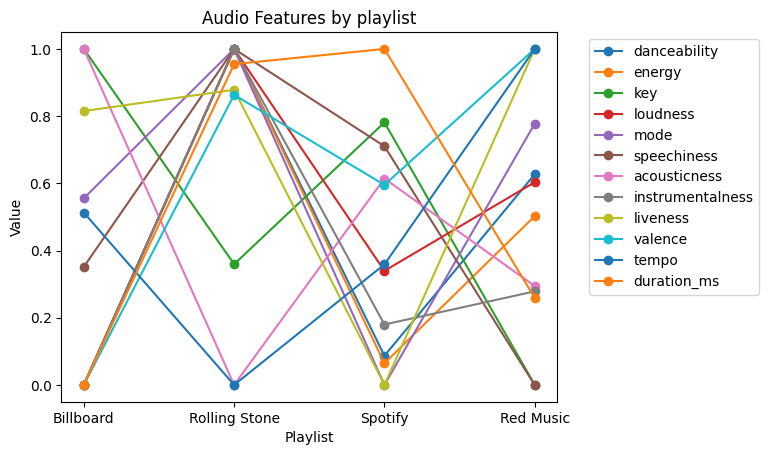

In [ ]:
import matplotlib.pyplot as plt
plt.plot(normalized_df.index, normalized_df.values, marker='o')

plt.title('Audio Features by playlist')
plt.xlabel('Playlist')
plt.ylabel('Value')
plt.legend(normalized_df.columns, bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.show()

In [ ]:
print("The maximum value of danceability: ", new_audio_df[new_audio_df['danceability']==new_audio_df["danceability"].max()].index)
print("The maximum value of energy: ", new_audio_df[new_audio_df['energy']==new_audio_df["energy"].max()].index)
print("The maximum value of key: ", new_audio_df[new_audio_df['key']==new_audio_df["key"].max()].index)
print("The maximum value of loudness: ", new_audio_df[new_audio_df['loudness']==new_audio_df["loudness"].max()].index)
print("The maximum value of mode: ", new_audio_df[new_audio_df['mode']==new_audio_df["mode"].max()].index)
print("The maximum value of speechiness: ", new_audio_df[new_audio_df['speechiness']==new_audio_df["speechiness"].max()].index)
print("The maximum value of acousticness: ", new_audio_df[new_audio_df['acousticness']==new_audio_df["acousticness"].max()].index)
print("The maximum value of instrumentalness: ", new_audio_df[new_audio_df['instrumentalness']==new_audio_df["instrumentalness"].max()].index)
print("The maximum value of liveness: ", new_audio_df[new_audio_df['liveness']==new_audio_df["liveness"].max()].index)
print("The maximum value of valence: ", new_audio_df[new_audio_df['valence']==new_audio_df["valence"].max()].index)
print("The maximum value of tempo: ", new_audio_df[new_audio_df['tempo']==new_audio_df["tempo"].max()].index)
print("The maximum value of duration_ms: ", new_audio_df[new_audio_df['duration_ms']==new_audio_df["duration_ms"].max()].index)

The maximum value of danceability:  Index(['Rolling Stone'], dtype='object')
The maximum value of energy:  Index(['Rolling Stone'], dtype='object')
The maximum value of key:  Index(['Billboard'], dtype='object')
The maximum value of loudness:  Index(['Rolling Stone'], dtype='object')
The maximum value of mode:  Index(['Rolling Stone'], dtype='object')
The maximum value of speechiness:  Index(['Rolling Stone'], dtype='object')
The maximum value of acousticness:  Index(['Billboard'], dtype='object')
The maximum value of instrumentalness:  Index(['Rolling Stone'], dtype='object')
The maximum value of liveness:  Index(['Red Music'], dtype='object')
The maximum value of valence:  Index(['Red Music'], dtype='object')
The maximum value of tempo:  Index(['Red Music'], dtype='object')
The maximum value of duration_ms:  Index(['Spotify'], dtype='object')


***Question 2) Are the selected music really popular in public?***

Even though the popularity score is computed from Spotify, we can figure out whether the selected songs are really popular in public or not based on the scores. <br>
Also, calculate the mean values of the popularity column of each playlist and compare them.

In [ ]:
print("The average score of popularity")
print("Billboard: ",billboard_final['popularity(100)'].mean())
print("Rolling Stone: ",rollingstone_final['popularity(100)'].mean())
print("Spotify: ",spotify_final['popularity(100)'].mean())
print("Red Music: ",redmusic_final['popularity(100)'].mean())

The average score of popularity
Billboard:  85.08
Rolling Stone:  65.52
Spotify:  63.07
Red Music:  73.83


The songs selected by **Billboard** are the most popular songs in public.

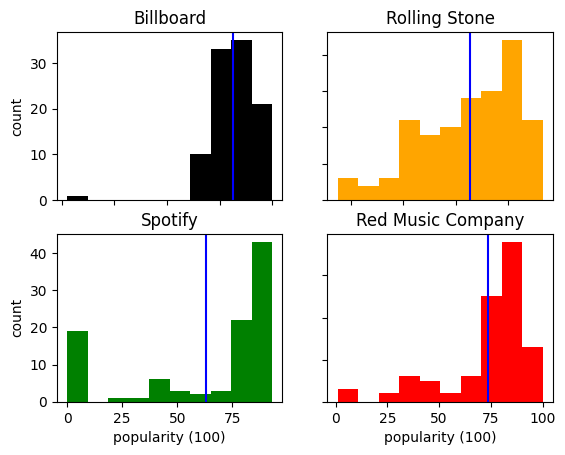

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(billboard_final['popularity(100)'], color = "black")
axs[0, 0].axvline(x=billboard_final['popularity(100)'].mean(), color = "blue")
axs[0, 0].set_title('Billboard')
axs[0, 1].hist(rollingstone_final['popularity(100)'], color = "orange")
axs[0, 1].axvline(x=rollingstone_final['popularity(100)'].mean(), color = "blue")
axs[0, 1].set_title('Rolling Stone')
axs[1, 0].hist(spotify_final['popularity(100)'], color = "green")
axs[1, 0].axvline(x=spotify_final['popularity(100)'].mean(), color = "blue")
axs[1, 0].set_title('Spotify')
axs[1, 1].hist(redmusic_final['popularity(100)'], color = "red")
axs[1, 1].axvline(x=redmusic_final['popularity(100)'].mean(), color = "blue")
axs[1, 1].set_title('Red Music Company')

for ax in axs.flat:
    ax.set(xlabel='popularity (100)', ylabel='count')

for ax in axs.flat:
    ax.label_outer()

*The blue line = Mean*

According to the visualizations of each playlist (company), we would say the followings.
1. **Billboard** selected the most popular songs in public.
2. **Rolling Stone** selected the songs in various range of popularity.

**Question 3) What are the relationships among the popularity and audio features?**

<ipython-input-99-d6f124bfa2ac>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(billboard_final.corr(), annot=True)


<Axes: >

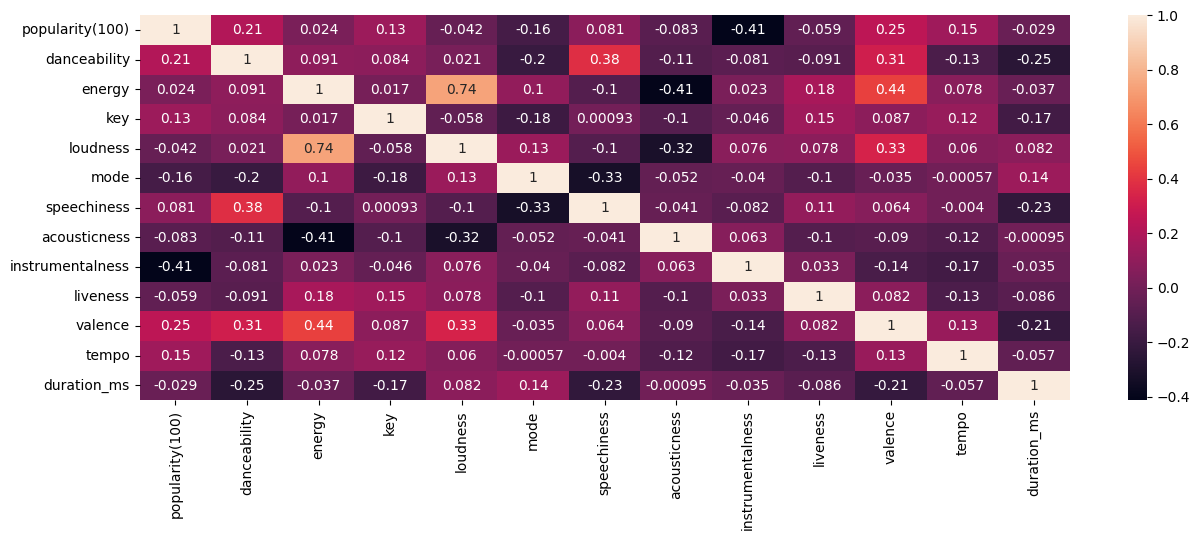

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(billboard_final.corr(), annot=True)

<ipython-input-100-6b831b6df84b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(rollingstone_final.corr(), annot=True)


<Axes: >

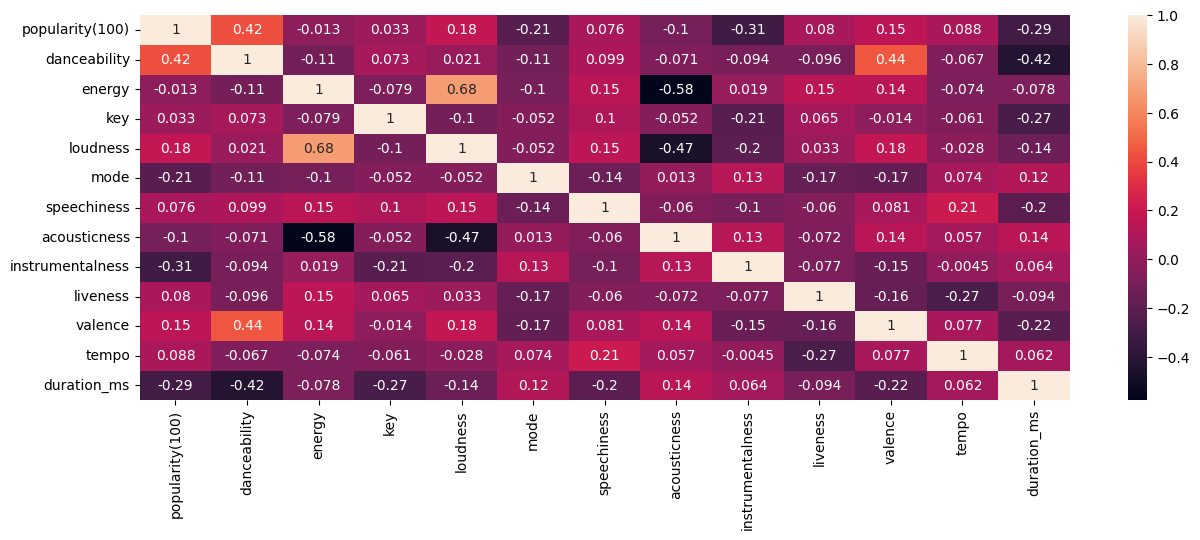

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(rollingstone_final.corr(), annot=True)

<ipython-input-101-f35391704ca8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(spotify_final.corr(), annot=True)


<Axes: >

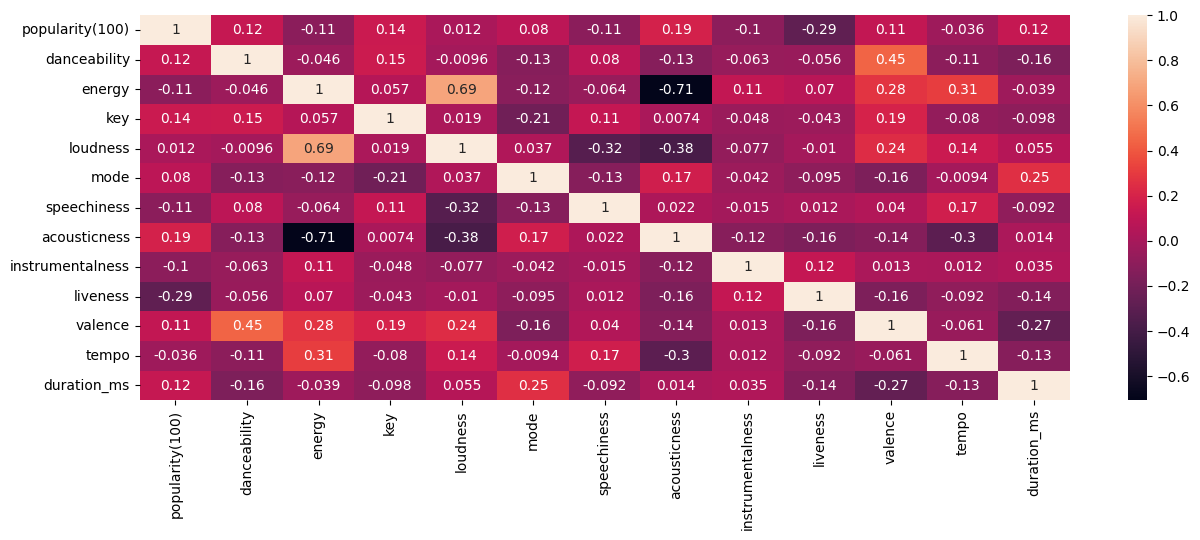

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(spotify_final.corr(), annot=True)

<ipython-input-102-2e1a1323dc08>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(billboard_final.corr(), annot=True)


<Axes: >

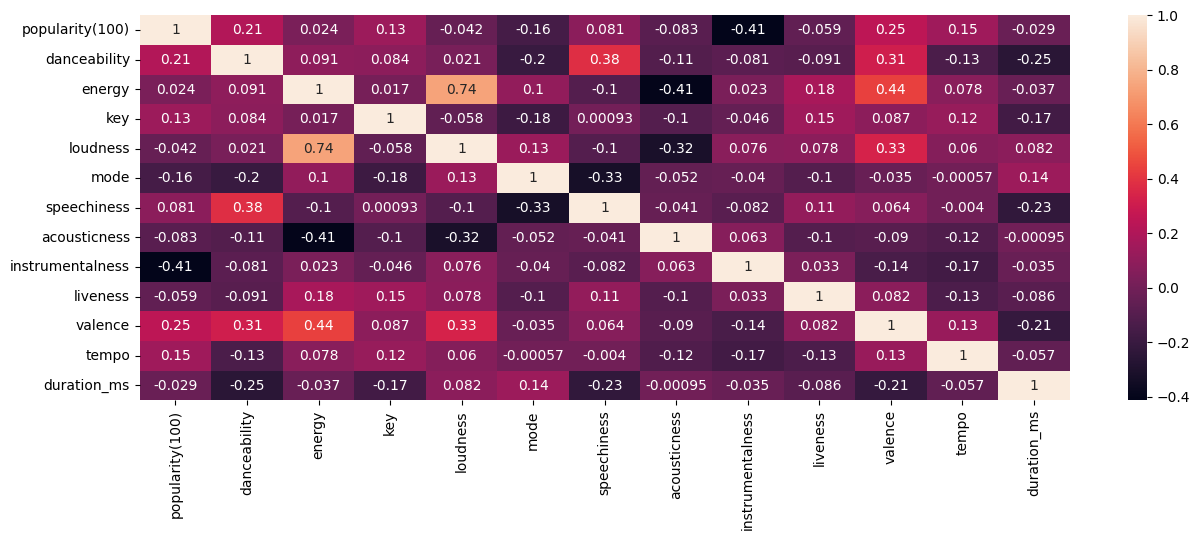

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(billboard_final.corr(), annot=True)